In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2NoZXJ5bGtvdWFkaW8vRG9jdW1lbnRzL1JlcG9zaXRvcmllcy9wZXJzb25hbC13ZWJzaXRlLzNBL3ZhbHVlLWF0LXJpc2s='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

/var/folders/4g/2x7xwt6106l13nxqljfks4gm0000gn/T/ipykernel_99186/3434538895.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/importlib/_bootstrap.py": 1731323902.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/importlib/_bootstrap_external.py": 1731323902.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/codecs.py": 1731323889.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/aliases.py": 1731323904.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/cp437.py": 1731323905.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/__init__.py": 1731323904.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/utf_8.py": 1731323906.0, "/Library/Developer/CommandLineT

In [2]:
# Définition des librairies
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm

/Users/cherylkouadio/Documents/Repositories/personal-website/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
# Import des données du CAC 40
data = yf.download("^FCHI")

# Calcul des rendements logarithmiques
data['log_return'] = np.log(data['Close'] / data['Close'].shift(1))

# Retirer la première ligne
data = data.dropna()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

In [4]:
train = data[['log_return',"Close"]]['15-10-2008':'26-07-2022']
data_train = train['log_return']
neg_data_train = -data_train

test = data[['log_return',"Close"]]['27-07-2022':'11-06-2024']
data_test = test['log_return']
neg_data_test = -data_test

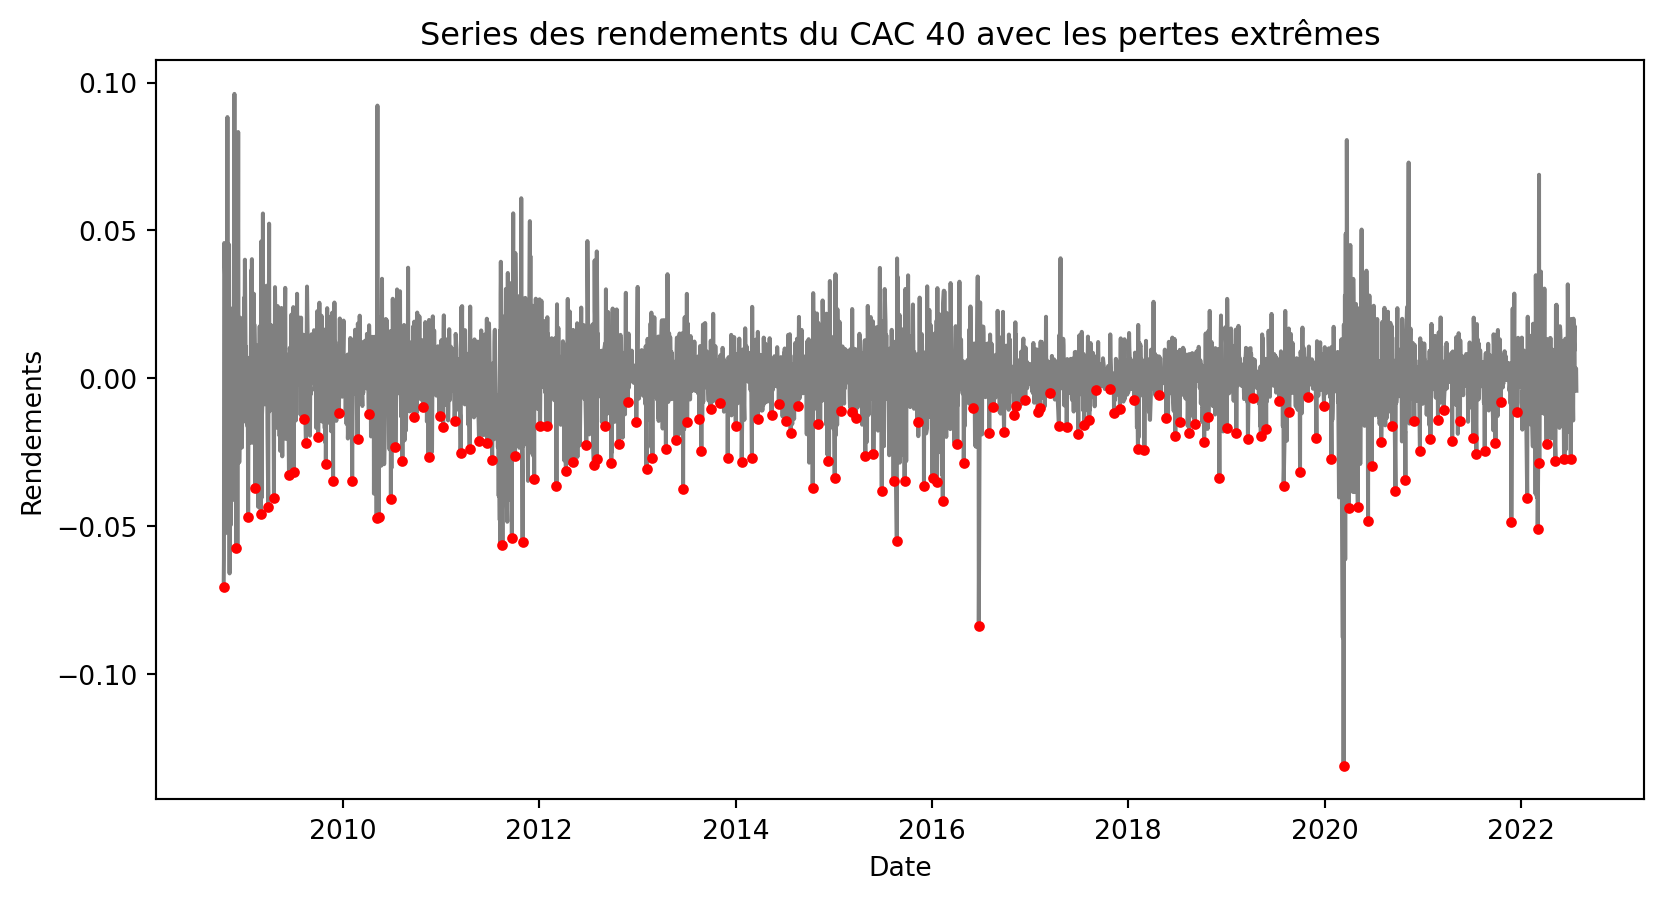

In [5]:
import numpy as np
import pandas as pd

def get_extremes(returns, block_size, min_last_block=0.6):
    """
    Extrait les valeurs extrêmes d'une série de rendements par blocs.
    
    Arguments :
    returns : pandas Series (index = dates, valeurs = rendements)
    block_size : int, taille du bloc en nombre de jours
    min_last_block : float, proportion minimale pour inclure le dernier bloc incomplet
    
    Retourne :
    maxima_sample : liste des valeurs maximales par bloc
    maxima_dates : liste des dates associées aux valeurs maximales
    """
    n = len(returns)
    num_blocks = n // block_size

    maxima_sample = []
    maxima_dates = []

    for i in range(num_blocks):
        block_start = i * block_size
        block_end = (i + 1) * block_size
        block_data = returns.iloc[block_start:block_end]  # Sélectionner le bloc avec les index

        max_value = block_data.max()
        max_date = block_data.idxmax()  # Récupérer l'index de la valeur max

        maxima_sample.append(max_value)
        maxima_dates.append(max_date)

    # Gestion du dernier bloc s'il reste des données suffisantes
    block_start = num_blocks * block_size
    block_data = returns.iloc[block_start:]

    if len(block_data) >= min_last_block * block_size:
        max_value = block_data.max()
        max_date = block_data.idxmax()
        
        maxima_sample.append(max_value)
        maxima_dates.append(max_date)
        
    return pd.Series(maxima_sample, index=maxima_dates)  # Retourner une Series avec les dates comme index


extremes = get_extremes(neg_data_train, block_size=21, min_last_block=0.6)

plt.figure(figsize=(10, 5))
plt.plot(data_train, color="grey")
plt.plot(-extremes,".", color="red") # 
plt.title("Series des rendements du CAC 40 avec les pertes extrêmes")
plt.xlabel("Date")
plt.ylabel("Rendements")
plt.show()

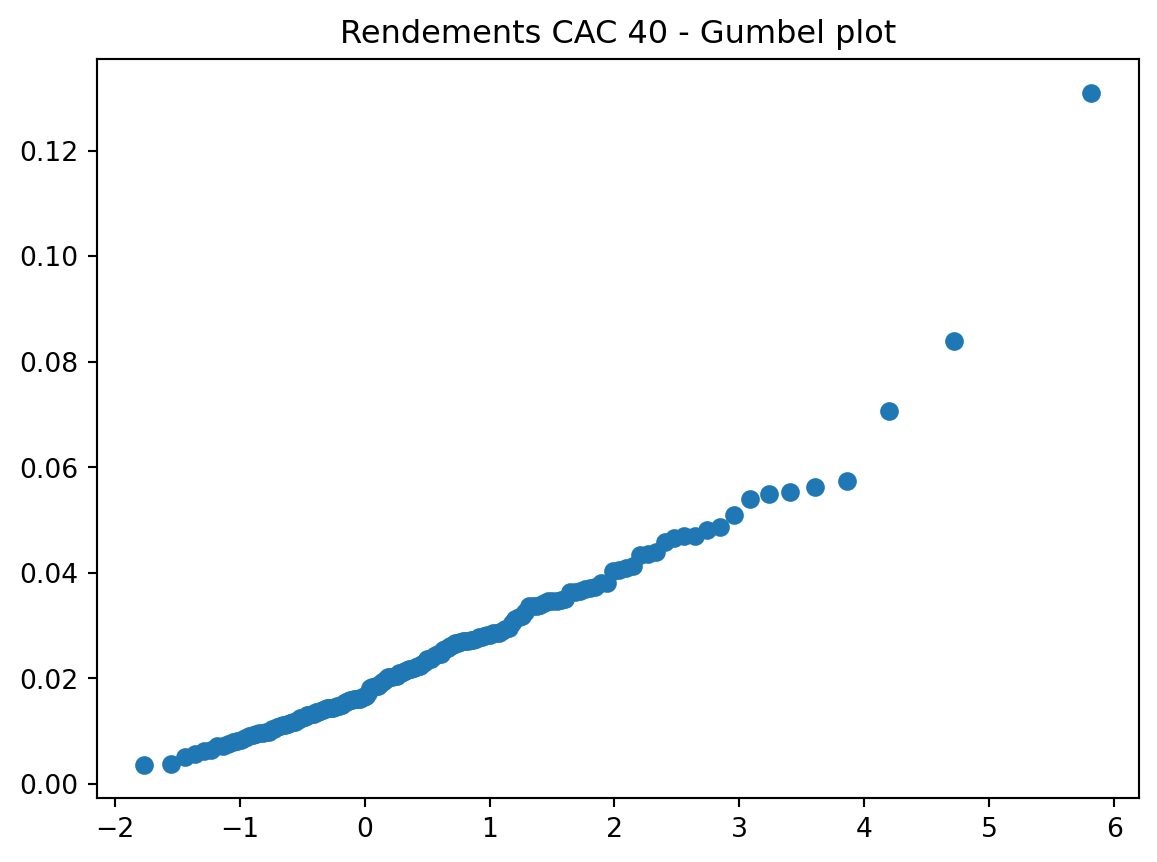

In [6]:
quantiles_theoriques_gumbel = []
k=len(extremes)
for i in range(1,len(extremes)+1):
    val = -np.log(-np.log((i-0.5)/k))
    quantiles_theoriques_gumbel.append(val)

# Tracer le Gumbel plot
plt.scatter(quantiles_theoriques_gumbel, np.sort(extremes), marker='o')
plt.title('Rendements CAC 40 - Gumbel plot')
plt.show()

In [7]:
from scipy.stats import genextreme as gev

params_gev = gev.fit(extremes)

shape, loc, scale = params_gev
# Afficher les paramètres estimés
print("="*50)
print("Paramètres estimés de la distribution GEV")
print("="*50)
print(f"Shape (xi) = {shape:.2f}")
print(f"Loc (mu) =  {loc:.2f}")
print(f"Scale (sigma) = {scale:.2f}")
print("="*50)

Paramètres estimés de la distribution GEV
Shape (xi) = -0.15
Loc (mu) =  0.02
Scale (sigma) = 0.01


IC profilé pour shape: [-0.287, -0.042]


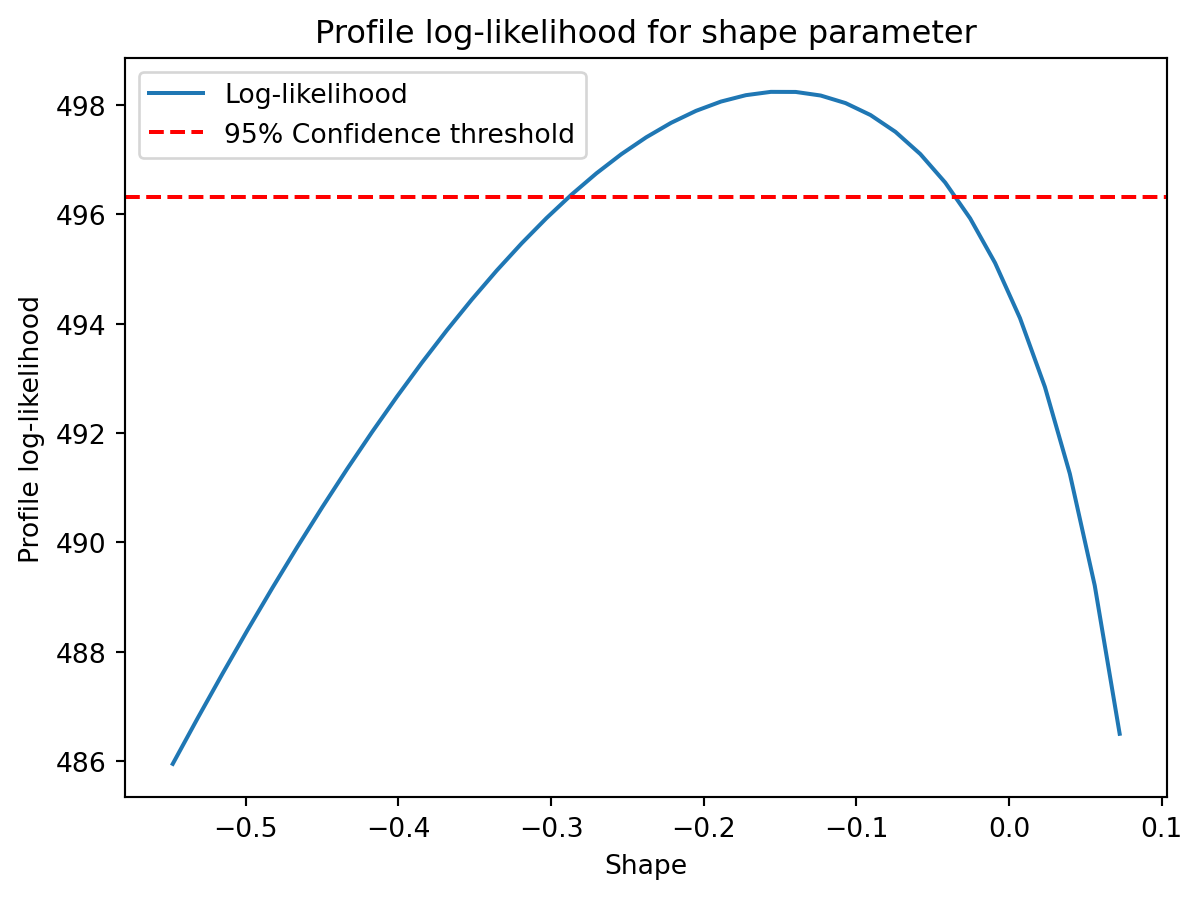

In [8]:
from scipy.optimize import minimize
from scipy.stats import chi2

# Fonction de log-vraisemblance
def gev_neg_log_likelihood(params, shape_fixed, data):
    """
    Calcule la log-vraisemblance négative de la distribution GEV
    en fixant le paramètre 'shape'.
    """
    loc, scale = params
    if scale <= 0:  # Contrainte pour éviter des valeurs invalides
        return np.inf
    return -np.sum(gev.logpdf(data, shape_fixed, loc=loc, scale=scale))

# Log-vraisemblance maximale
log_likelihood_max = -gev_neg_log_likelihood([loc, scale], shape, extremes)

# Calcul des IC profilés pour le paramètre shape
shape_grid = np.linspace(shape - 0.4, shape + 0.4, 50)  # Plage autour de la valeur estimée
profile_likelihood = []

for s in shape_grid:
    # Réoptimiser loc et scale en fixant shape
    result = minimize(
        gev_neg_log_likelihood,
        x0=[loc, scale],  # Initial guess for loc and scale
        args=(s, extremes),  # Fixer 'shape' à la valeur actuelle
        bounds=[(None, None), (1e-5, None)],  # Contraintes sur loc et scale
        method='L-BFGS-B'
    )
    if result.success:
        profile_likelihood.append(-result.fun)
    else:
        profile_likelihood.append(np.nan)

# Calcul du seuil pour les IC
chi2_threshold = log_likelihood_max - chi2.ppf(0.95, 1) / 2

# Déterminer les bornes des IC
profile_likelihood = np.array(profile_likelihood)
valid_points = np.where(profile_likelihood >= chi2_threshold)[0]
if len(valid_points) > 0:
    lower_bound = shape_grid[valid_points[0]]
    upper_bound = shape_grid[valid_points[-1]]
    print(f"IC profilé pour shape: [{lower_bound:.3f}, {upper_bound:.3f}]")
else:
    print("Impossible de déterminer des IC profilés avec les paramètres actuels.")

# Tracé du profil de log-vraisemblance
plt.plot(shape_grid, profile_likelihood, label="Log-likelihood")
plt.axhline(chi2_threshold, color='red', linestyle='--', label="95% Confidence threshold")
plt.xlabel("Shape")
plt.ylabel("Profile log-likelihood")
plt.title("Profile log-likelihood for shape parameter")
plt.legend()
plt.show()

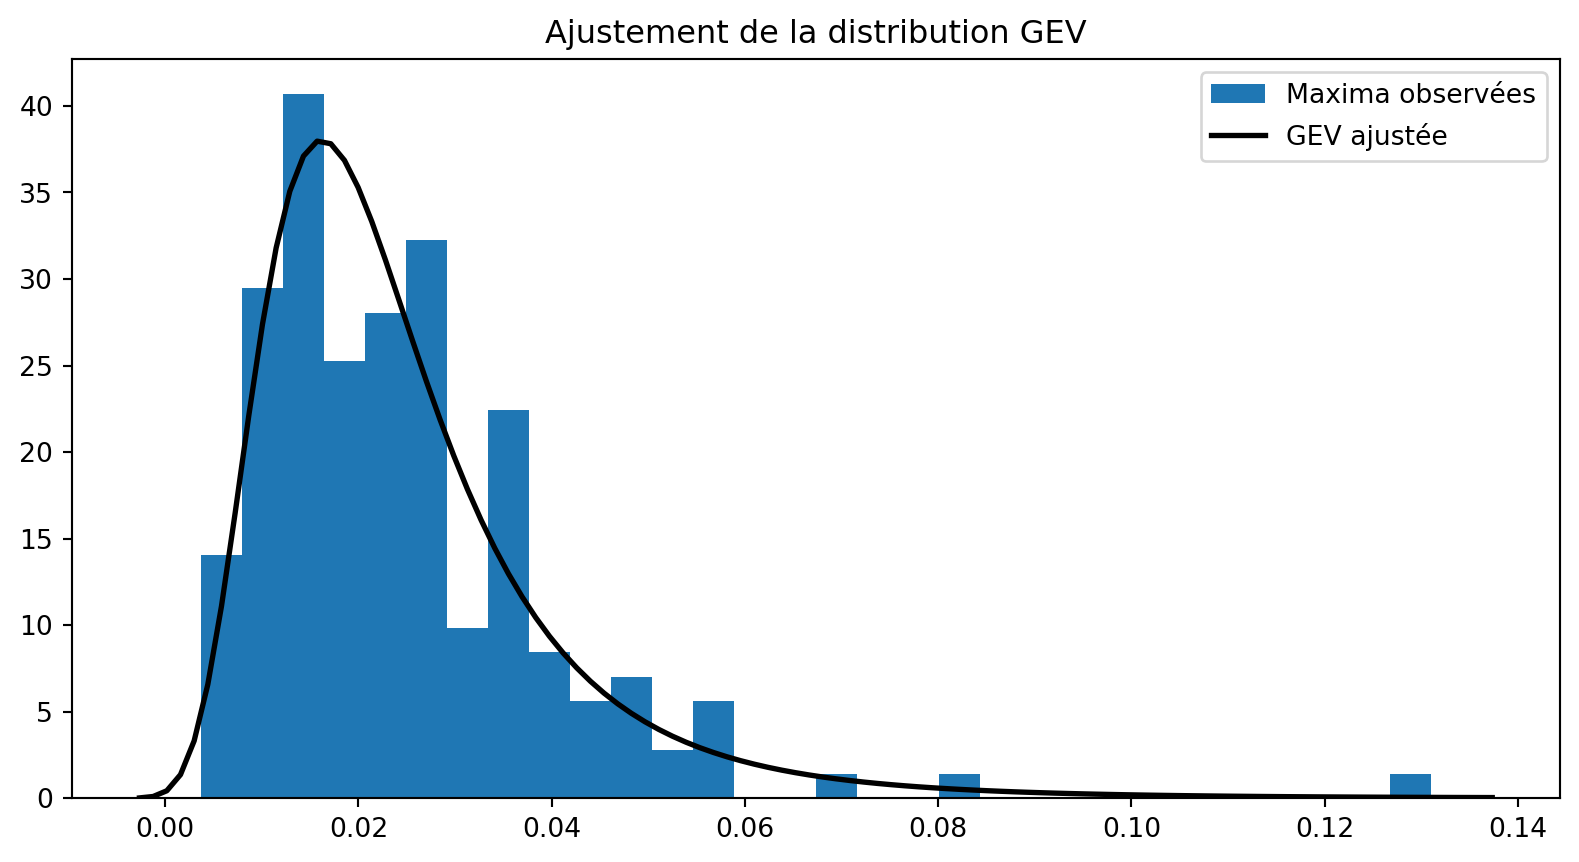

In [9]:
plt.figure(figsize=(10, 5))
plt.hist(extremes, bins=30, density=True, label='Maxima observées')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p_gev = gev.pdf(x, *params_gev)
plt.plot(x, p_gev, 'k', linewidth=2, label='GEV ajustée')
plt.title("Ajustement de la distribution GEV")
plt.legend()
plt.show()

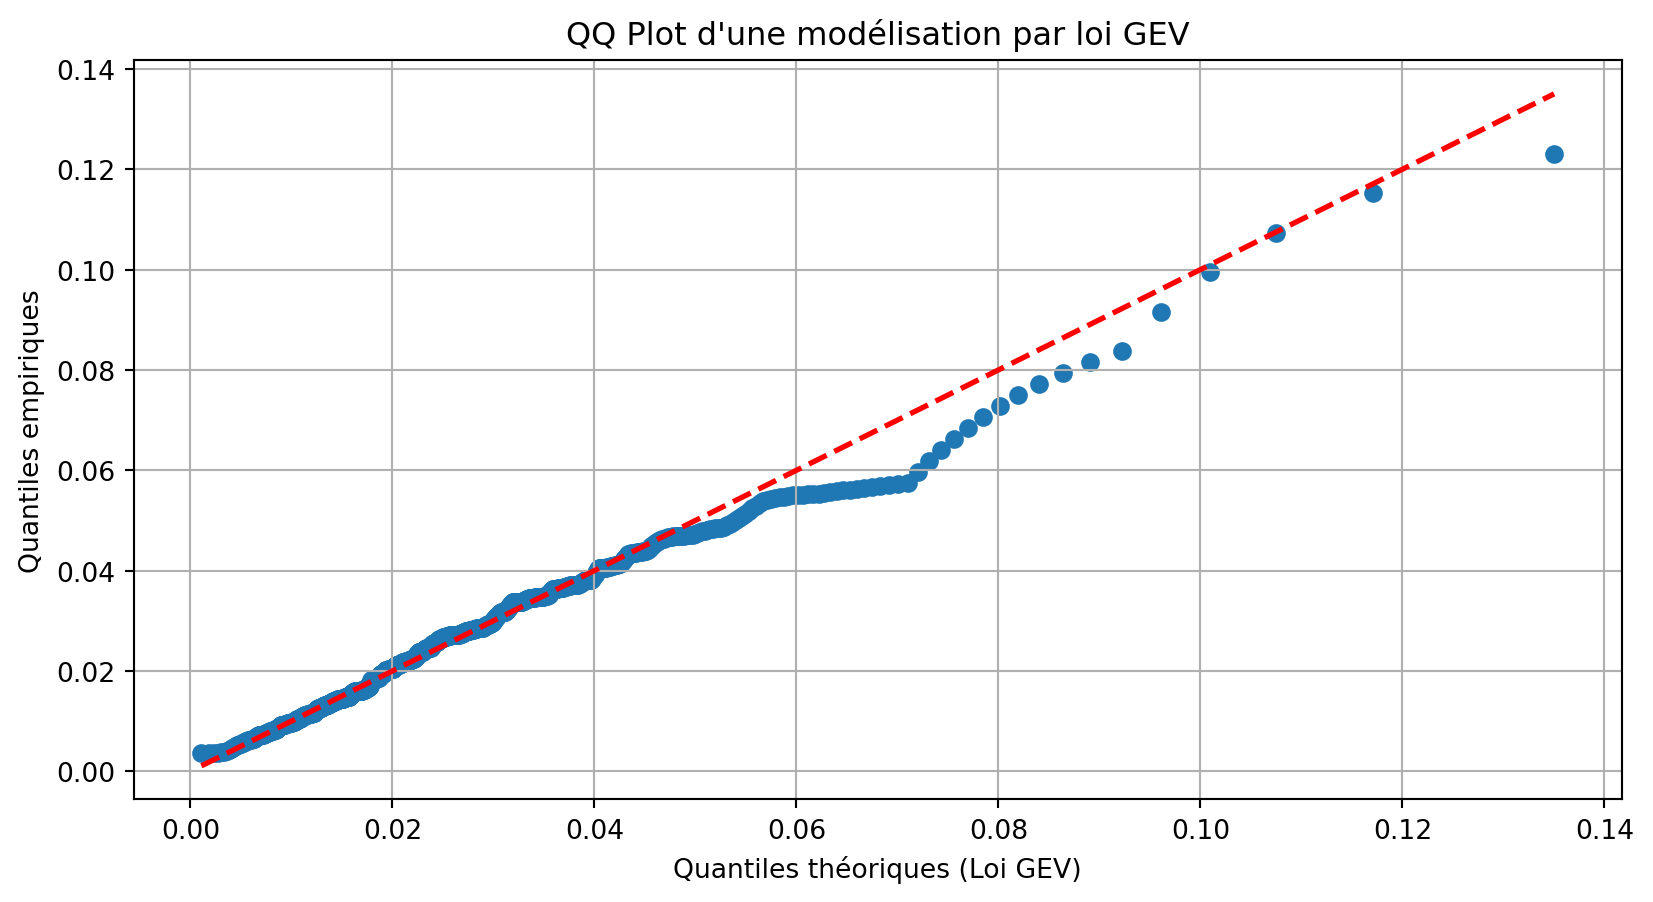

In [10]:
niveaux_quantiles = np.arange(0.001,1, 0.001)
quantiles_empiriques_TVE = np.quantile(extremes, niveaux_quantiles) 
quantiles_theoriques_GEV = gev.ppf(niveaux_quantiles, shape, loc = loc, scale = scale)

plt.figure(figsize=(10, 5))
plt.scatter(quantiles_theoriques_GEV, quantiles_empiriques_TVE)
plt.plot(quantiles_theoriques_GEV, quantiles_theoriques_GEV, color='red', linestyle='dashed', linewidth=2, label='Première bissectrice')
plt.title("QQ Plot d'une modélisation par loi GEV")
plt.xlabel('Quantiles théoriques (Loi GEV)')
plt.ylabel('Quantiles empiriques')
plt.grid(True)
plt.show()

In [11]:
def BM_var(alpha,s,shape,loc,scale):
    """
    Calcul de la VaR gaussienne
    alpha : le niveau de confiance de la VaR
    s : le nombre de jours dans un bloc
    """
    alpha_bm = 1-s*(1-alpha)

    return gev.ppf(alpha_bm, shape, loc = loc, scale = scale),alpha_bm

alpha = 0.99
var_BM_train,alpha_bm = BM_var(0.99, 21, shape, loc, scale)

print(f"La VaR TVE pour h=1j et alpha={alpha} est : {var_BM_train:.4%}")
print(f"La VaR TVE pour h=10j et alpha={alpha} est : {(10**alpha_bm)*var_BM_train:.4%}")

La VaR TVE pour h=1j et alpha=0.99 est : 3.3274%
La VaR TVE pour h=10j et alpha=0.99 est : 20.5167%


In [12]:
from scipy.stats import gumbel_r

params_gumbel = gumbel_r.fit(extremes)

# Afficher les paramètres estimés
print("="*50)
print("Paramètres estimés de la distribution GEV GUMBEL")
print("="*50)
print(f"Loc (mu) =  {params_gumbel[0]:.2f}")
print(f"Scale (sigma) = {params_gumbel[1]:.2f}")
print("="*50)

Paramètres estimés de la distribution GEV GUMBEL
Loc (mu) =  0.02
Scale (sigma) = 0.01


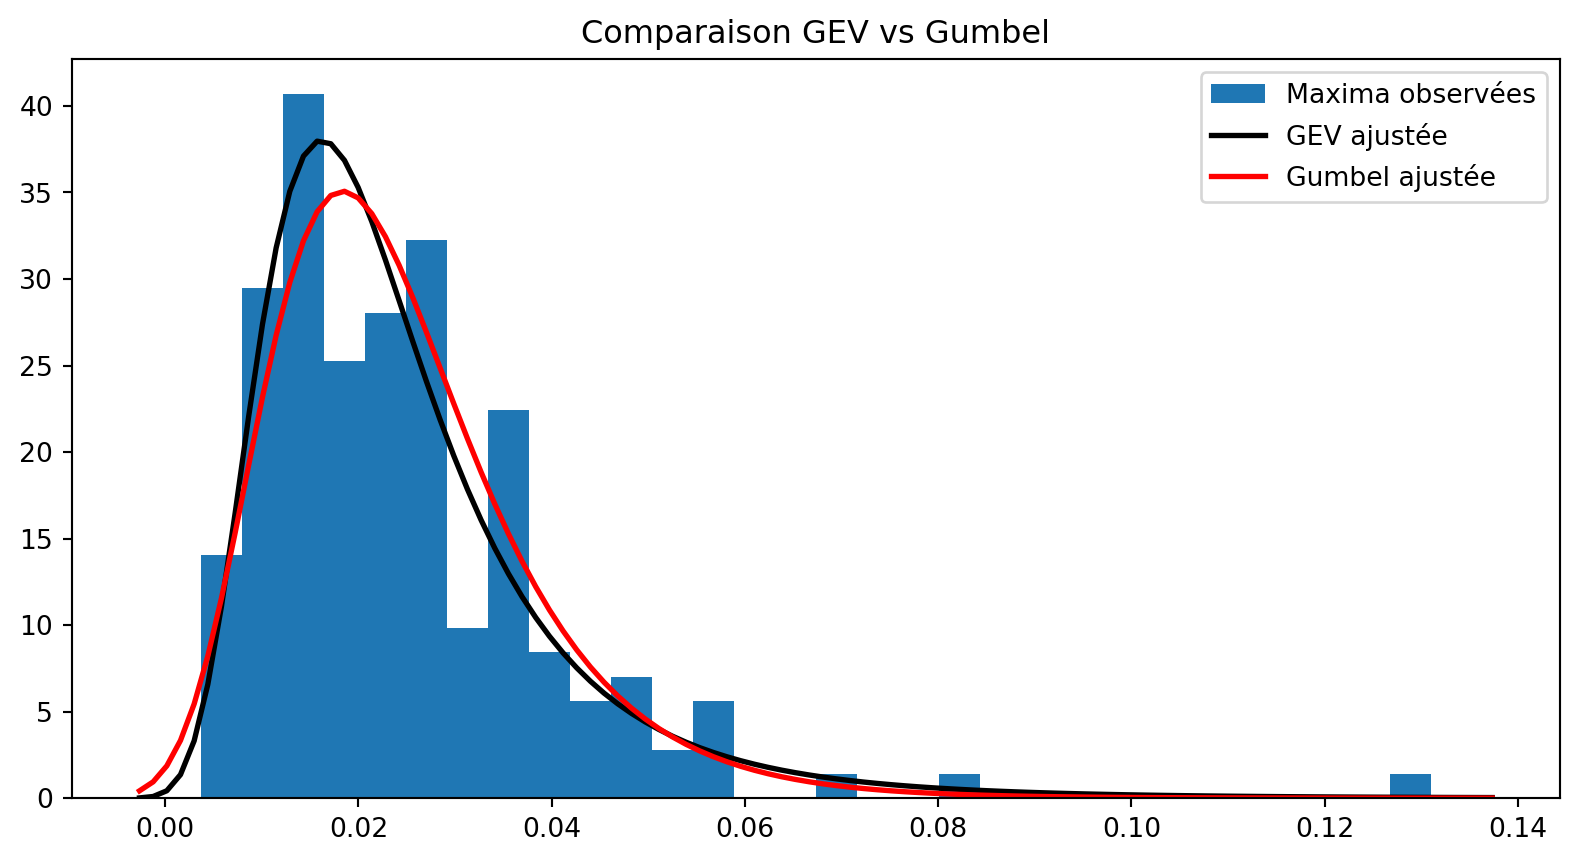

In [13]:
plt.figure(figsize=(10, 5))
plt.hist(extremes, bins=30, density=True, label='Maxima observées')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# Densité GEV ajustée
p_gev = gev.pdf(x, *params_gev)
plt.plot(x, p_gev, 'k', linewidth=2, label='GEV ajustée')

# Densité Gumbel ajustée
p_gumbel = gumbel_r.pdf(x, *params_gumbel)
plt.plot(x, p_gumbel, 'r', linewidth=2, label='Gumbel ajustée')
title = "Comparaison GEV vs Gumbel"
plt.title(title)
plt.legend()
plt.show()

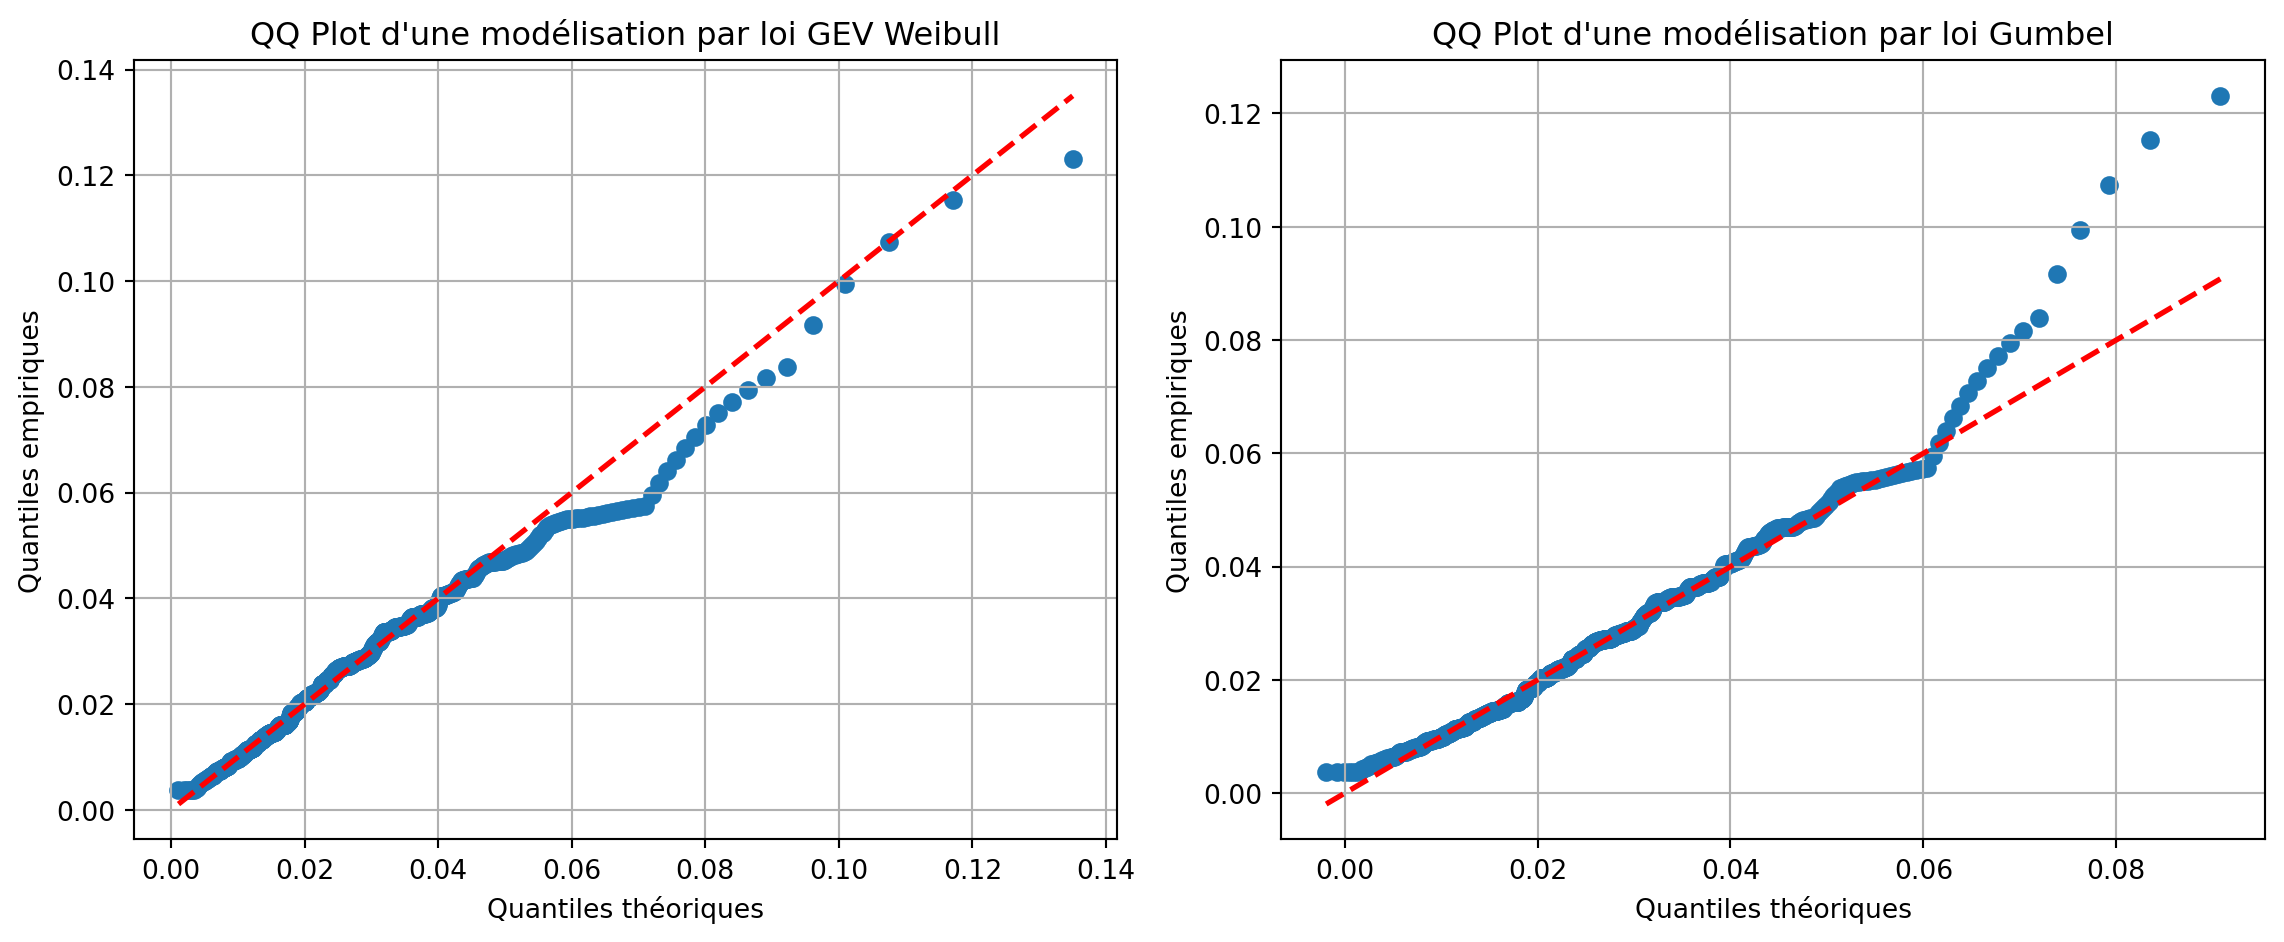

In [14]:
quantiles_theoriques_Gumb = gumbel_r.ppf(niveaux_quantiles, *params_gumbel)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(quantiles_theoriques_GEV, quantiles_empiriques_TVE)
plt.plot(quantiles_theoriques_GEV, quantiles_theoriques_GEV, color='red', linestyle='dashed', linewidth=2, label='Première bissectrice')
plt.title("QQ Plot d'une modélisation par loi GEV Weibull")
plt.xlabel('Quantiles théoriques')
plt.ylabel('Quantiles empiriques')
plt.grid(True)


plt.subplot(1, 2, 2)
plt.scatter(quantiles_theoriques_Gumb, quantiles_empiriques_TVE)
plt.plot(quantiles_theoriques_Gumb, quantiles_theoriques_Gumb, color='red', linestyle='dashed', linewidth=2, label='Première bissectrice')
plt.title("QQ Plot d'une modélisation par loi Gumbel")
plt.xlabel('Quantiles théoriques')
plt.ylabel('Quantiles empiriques')
plt.grid(True)

plt.tight_layout()
plt.show()

In [15]:
alpha = 0.99
var_BM_train,alpha_bm = BM_var(0.99, 21, shape=0, loc=params_gumbel[0], scale=params_gumbel[1])

print(f"La VaR TVE Gumbel pour h=1j et alpha={alpha} est : {var_BM_train:.4%}")
print(f"La VaR TVE Gumbel pour h=10j et alpha={alpha} est : {(10**alpha_bm)*var_BM_train:.4%}")

La VaR TVE Gumbel pour h=1j et alpha=0.99 est : 3.3513%
La VaR TVE Gumbel pour h=10j et alpha=0.99 est : 20.6638%


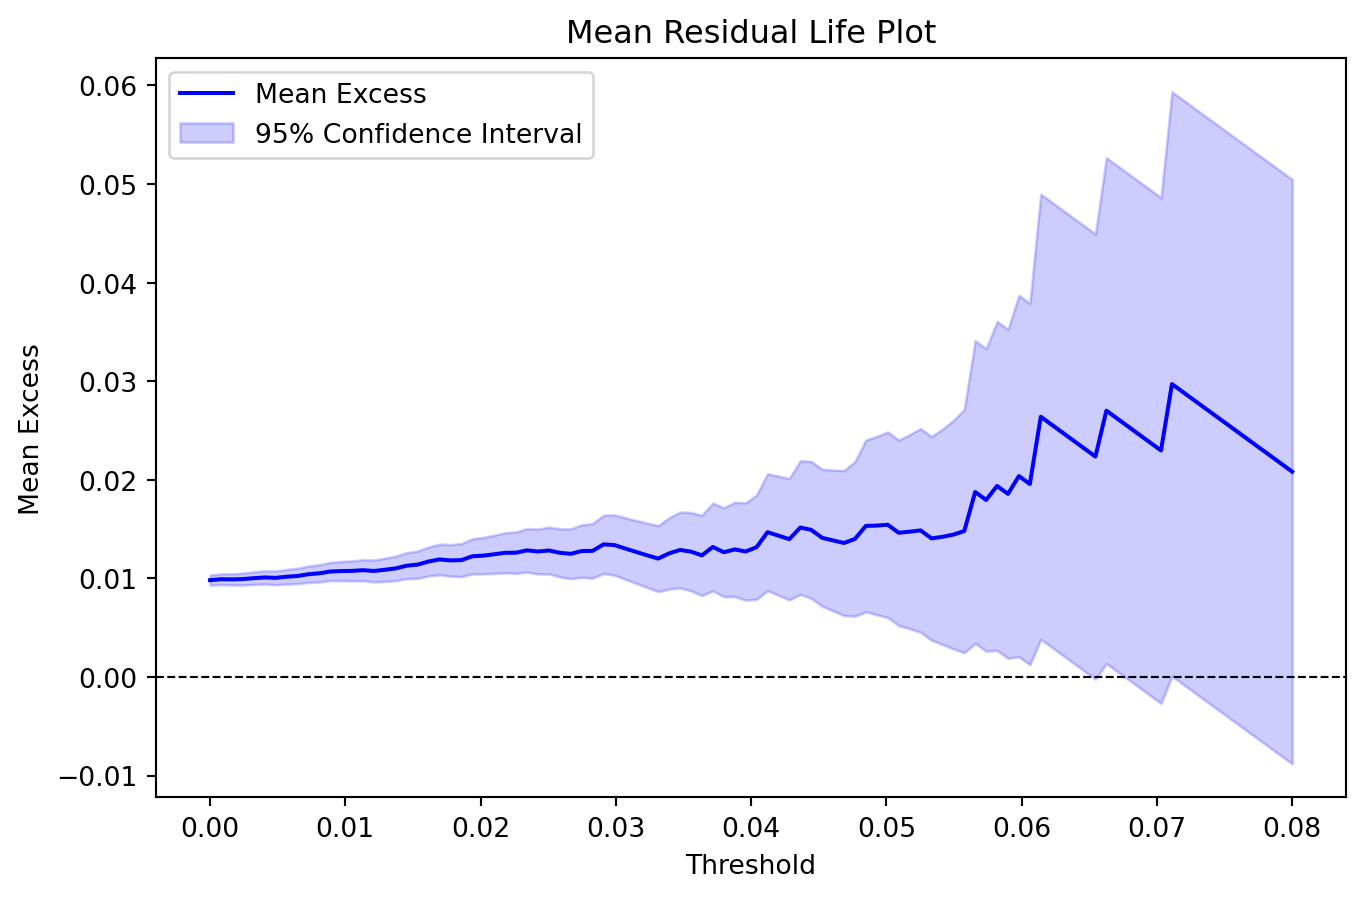

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, genpareto

def mean_residual_life_plot(data, tlim=None, pscale=False, nt=100, conf=0.95, return_values=False):
    """
    Trace le Mean Residual Life (MRL) Plot pour identifier un seuil optimal pour une GPD.

    Paramètres :
    - data : array-like, données d'entrée.
    - tlim : tuple (min, max), limites des seuils (si None, calculé automatiquement).
    - pscale : bool, si True, utilise des quantiles au lieu de valeurs absolues.
    - nt : int, nombre de seuils à considérer.
    - conf : float, niveau de confiance pour l'intervalle (ex: 0.95 pour 95%).

    Retourne :
    - Un graphique MRL avec l'intervalle de confiance.
    """

    # Trier et filtrer les données
    data = np.sort(data[~np.isnan(data)])
    nn = len(data)
    if nn <= 5:
        raise ValueError("Les données contiennent trop peu de valeurs valides.")

    # Définition des seuils
    if tlim is None:
        tlim = (data[0], data[nn - 5])  # Évite les 4 plus grandes valeurs

    if np.all(data <= tlim[1]):
        raise ValueError("La borne supérieure du seuil est trop élevée.")

    if pscale:
        # Travailler en quantiles au lieu de valeurs absolues
        tlim = (np.mean(data <= tlim[0]), np.mean(data <= tlim[1]))
        pvec = np.linspace(tlim[0], tlim[1], nt)
        thresholds = np.quantile(data, pvec)
    else:
        thresholds = np.linspace(tlim[0], tlim[1], nt)

    # Initialiser les résultats
    mean_excess = np.zeros(nt)
    lower_conf = np.zeros(nt)
    upper_conf = np.zeros(nt)

    # Calcul du Mean Excess et de l'IC
    for i, u in enumerate(thresholds):
        exceedances = data[data > u] - u  # Excès au-dessus du seuil
        if len(exceedances) == 0:
            mean_excess[i] = np.nan
            lower_conf[i] = np.nan
            upper_conf[i] = np.nan
            continue
        
        mean_excess[i] = np.mean(exceedances)
        std_dev = np.std(exceedances, ddof=1)
        margin = norm.ppf((1 + conf) / 2) * std_dev / np.sqrt(len(exceedances))
        
        lower_conf[i] = mean_excess[i] - margin
        upper_conf[i] = mean_excess[i] + margin

    # Tracé du Mean Residual Life Plot
    plt.figure(figsize=(8, 5))
    plt.plot(thresholds, mean_excess, label="Mean Excess", color='blue')
    plt.fill_between(thresholds, lower_conf, upper_conf, color='blue', alpha=0.2, label=f"{conf*100:.0f}% Confidence Interval")
    plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
    plt.xlabel("Threshold" if not pscale else "Threshold Probability")
    plt.ylabel("Mean Excess")
    plt.title("Mean Residual Life Plot")
    plt.legend()
    plt.show()
    if return_values:
        return thresholds, mean_excess, lower_conf, upper_conf

mean_residual_life_plot(neg_data_train, tlim=[0,0.08])

# regarder quantile à 5%

In [17]:
u = 0.03
excess_values = [value - u for value in neg_data_train if value >= u]

from scipy.stats import genpareto

params_gpd = genpareto.fit(excess_values)

# Afficher les paramètres estimés
print("Paramètres estimés de la distribution GPD:")
print(f"Shape (xi) = {params_gpd[0]:.2f}")
print(f"Localisation (mu) = {params_gpd[1]:.2f}")
print(f"Echelle (sigma) = {params_gpd[2]:.2f}")

Paramètres estimés de la distribution GPD:
Shape (xi) = 1.33
Localisation (mu) = 0.00
Echelle (sigma) = 0.01


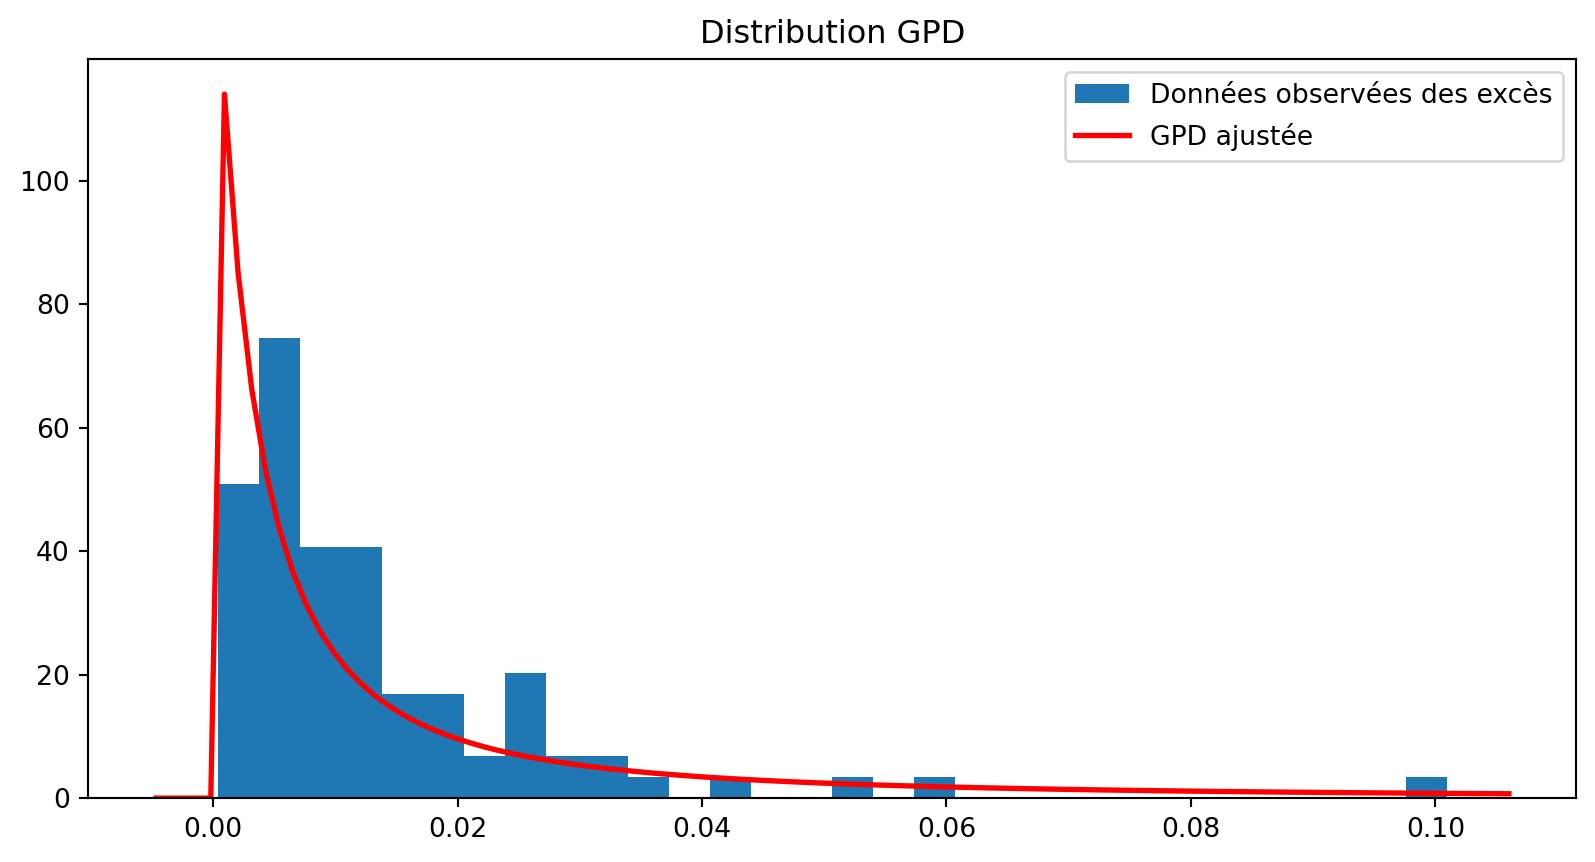

In [18]:
plt.figure(figsize=(10, 5))
plt.hist(excess_values, bins=30, density=True, label='Données observées des excès')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# Densité GPD ajustée
p_gpd = genpareto.pdf(x, *params_gpd)
plt.plot(x, p_gpd, 'r', linewidth=2, label='GPD ajustée')

title = "Distribution GPD"
plt.title(title)
plt.legend()
plt.show()

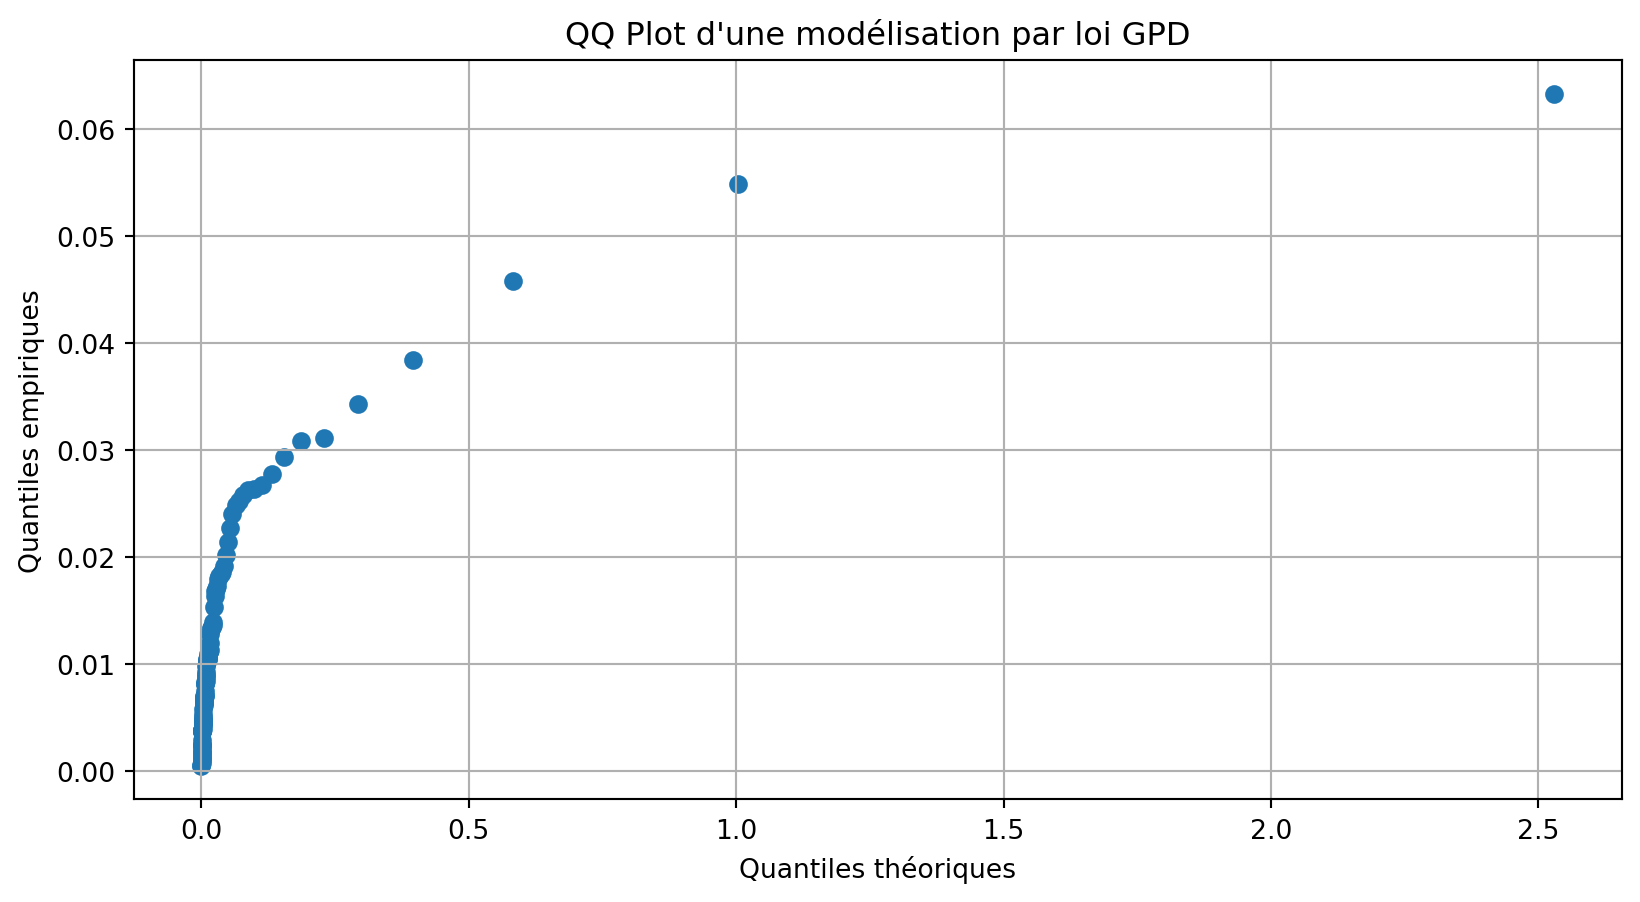

In [19]:
niveaux_quantiles = np.arange(0.01, 1, 0.01)
quantiles_empiriques_POT = np.quantile(excess_values, niveaux_quantiles)
quantiles_theoriques_GDP = genpareto.ppf(niveaux_quantiles, *params_gpd)

plt.figure(figsize=(10, 5))

plt.scatter(quantiles_theoriques_GDP, quantiles_empiriques_POT)
plt.title("QQ Plot d'une modélisation par loi GPD")
plt.xlabel('Quantiles théoriques')
plt.ylabel('Quantiles empiriques')
plt.grid(True)
plt.show()

In [20]:
def POT_var(data,alpha,u,shape,loc,scale):
    """
    Calcul de la VaR gaussienne
    alpha : le niveau de confiance de la VaR
    s : le nombre de jours dans un bloc
    """
    n = len(data)
    excess_values = [value - u for value in data if value >= u]
    nu = len(excess_values)

    alpha_pot = 1-n*(1-alpha)/nu

    return genpareto.ppf(alpha_pot, shape, loc = loc, scale = scale) + u,alpha_pot

alpha = 0.99
var_POT_train,alpha_pot = POT_var(neg_data_train, alpha, u,*params_gpd)

print(f"La VaR TVE pour h=1j et alpha={alpha} est : {var_POT_train:.4%}")
print(f"La VaR TVE pour h=10j et alpha={alpha} est : {(10**alpha_pot)*var_POT_train:.4%}")

La VaR TVE pour h=1j et alpha=0.99 est : 4.3634%
La VaR TVE pour h=10j et alpha=0.99 est : 17.3572%
